In [1]:
import requests
#import requests_ftp
import requests_cache
import lxml
import urllib2
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
#requests_cache.install_cache('coll_cache')
%matplotlib inline

In [2]:
def fileReader(files):
    title_names = []
    for f in files:
        title_file = open(f,"r")
        for line in title_file:
            line = line.strip()
            title_names.append(line)
    title_file.close()    
    return title_names
other = ['wsj.txt', 'npr.txt', 'economist.txt']
liberal = ['abc.txt', 'Huffpost.txt', 'nytimes.txt', 'washington.txt']
conservative = ['fox.txt']


In [3]:
other = fileReader(other)
liberal = fileReader(liberal)

In [15]:
conservative = fileReader(conservative)

In [4]:
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

/Users/noa/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
def posNeg(title_names):
    sid = SentimentIntensityAnalyzer()
    pos = []
    neg = []
    neu = []
    for sentence in title_names:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print ss
        pos.append(ss['pos'])
        neg.append(ss['neg'])
        neu.append(ss['neu'])
    positive = sum([x for x in pos])
    negative = sum([x for x in neg])
    tokentit = [re.sub("[^a-zA-Z]"," ",i) for i in title_names]
    return positive, negative, tokentit

In [6]:
otherPos, otherNeg, otherToken = posNeg(other)

In [7]:
libPos, libNeg, libToken = posNeg(liberal)

In [68]:
libPos

36.76799999999999

In [16]:
conPos, conNeg, conToekn = posNeg(conservative)

In [17]:
conNeg

28.383000000000013

In [8]:
def plotBar(positive, negative, type):
    bars = [positive/(positive + negative),negative/(positive + negative)]
    N = len(bars)
    x = range(N)
    width = 1/1.5
    ind = np.arange(N)  # the x locations for the groups
    fig, ax = plt.subplots()
    this = ax.bar(x, bars, width, color="blue")
    ax.set_ylabel('Percent')
    ax.set_title(type)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('Positive', 'Negative'))
    plt.show()

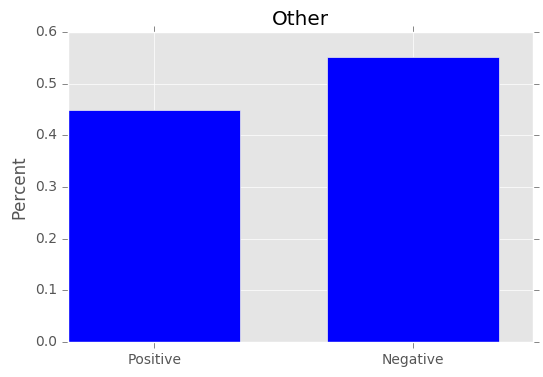

In [9]:
plotBar(otherPos, otherNeg, 'Other')

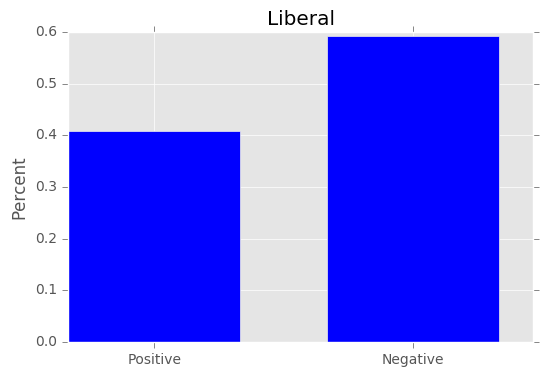

In [10]:
plotBar(libPos, libNeg, 'Liberal')

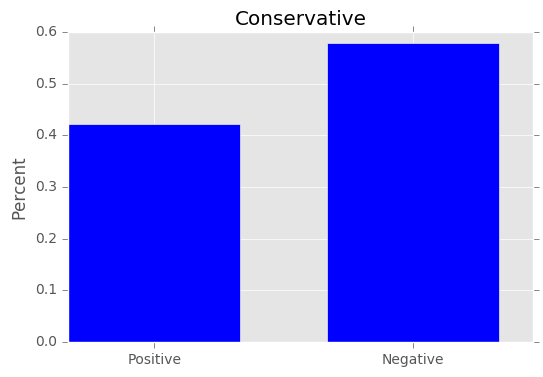

In [18]:
plotBar(conPos, conNeg, 'Conservative')

In [17]:
import itertools
def plotWordCloud(tokentit,type):
    trumps_admin = ['whitehouse','trump','conway','sessions','pence','president','tillerson','devos','flynn','kushner','carson','department','preibus','bannon','spicer','miller']
    tokenword = [word_tokenize(w) for w in tokentit]
    merged = list(itertools.chain(*tokenword))
    firstnames = ['steve','donald','jeff','sean']
    words = [w for w in merged if not w in stopwords.words("english")]
    wording = [w for w in words if not w in trumps_admin]
    wordtwo = [w for w in wording if not w in firstnames]
    word = " ".join(wordtwo)
    wordcloudcamp = WordCloud(max_font_size=40).generate(word)
    
    plt.figure()
    plt.title(type)
    plt.imshow(wordcloudcamp)
    plt.axis("off")
    plt.show()

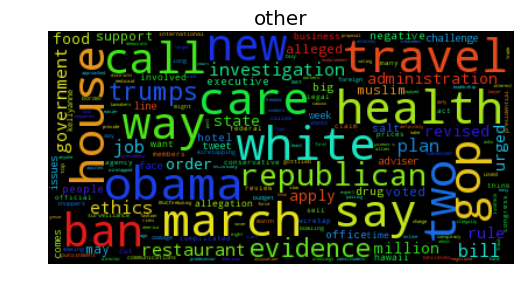

In [18]:
plotWordCloud(otherToken, "other")

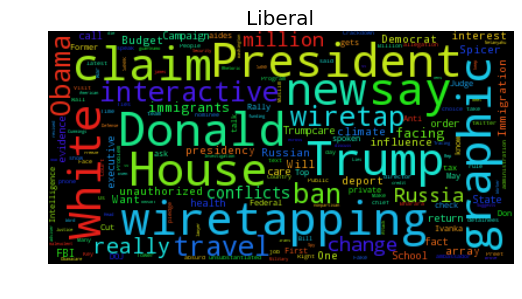

In [19]:
plotWordCloud(libToken, "Liberal")

In [19]:
from textblob import TextBlob

In [26]:
text = ''.join(liberal)

In [27]:
text

"Trump hasnt spoken to FBI dir. about wiretap claims: Spicer,Top Trumpcare takeaways, changes,Tracing where Trump gets some of his news ,Fact-checking Trump on Gitmo detainees,Trump has not spoken to FBI director about wiretapping claims, Spicer says,Spicer says Trump has not spoken to FBI director about wiretapping claims,Tracing where President Trump gets some of his news ,Fact-checking Trump on Guantanamo Bay detainees,What we know about Trumps unsubstantiated wiretapping allegations,President Trump surprises group on White House tour,Fist-pumping President Trump greets crowd of screaming kids,Trump very confident in his unsubstantiated wiretap claims, confidant says ,Trump, Netanyahu speak by phone, discuss Irans malevolent behavior,Exxon announces expansion program, Trump takes credit,Clapper denies Trump wiretap claim, calling it a distraction ,How Trumps new travel ban compares with its predecessor ,Trump says Planned Parenthood can keep funding if it cuts abortions ,Reaction to

In [28]:
blob = TextBlob(text)

In [29]:
blob.tags

[('Trump', u'NNP'),
 ('hasnt', u'NN'),
 ('spoken', u'VBN'),
 ('to', u'TO'),
 ('FBI', u'NNP'),
 ('dir', u'NN'),
 ('about', u'IN'),
 ('wiretap', u'JJ'),
 ('claims', u'NNS'),
 ('Spicer', u'NNP'),
 ('Top', u'NNP'),
 ('Trumpcare', u'NNP'),
 ('takeaways', u'VBZ'),
 ('changes', u'NNS'),
 ('Tracing', u'VBG'),
 ('where', u'WRB'),
 ('Trump', u'NNP'),
 ('gets', u'VBZ'),
 ('some', u'DT'),
 ('of', u'IN'),
 ('his', u'PRP$'),
 ('news', u'NN'),
 ('Fact-checking', u'NNP'),
 ('Trump', u'NNP'),
 ('on', u'IN'),
 ('Gitmo', u'NNP'),
 ('detainees', u'NNS'),
 ('Trump', u'NNP'),
 ('has', u'VBZ'),
 ('not', u'RB'),
 ('spoken', u'VBN'),
 ('to', u'TO'),
 ('FBI', u'NNP'),
 ('director', u'NN'),
 ('about', u'IN'),
 ('wiretapping', u'VBG'),
 ('claims', u'NNS'),
 ('Spicer', u'NNP'),
 ('says', u'VBZ'),
 ('Spicer', u'NNP'),
 ('says', u'VBZ'),
 ('Trump', u'NNP'),
 ('has', u'VBZ'),
 ('not', u'RB'),
 ('spoken', u'VBN'),
 ('to', u'TO'),
 ('FBI', u'NNP'),
 ('director', u'NN'),
 ('about', u'IN'),
 ('wiretapping', u'VBG'),
 ('c

In [24]:
text

'Trump hasnt spoken to FBI dir. about wiretap claims: Spicer,'

In [45]:
polarity = []
for i in range(0, len(liberal)):
    blob = TextBlob(liberal[i])
    for sentence in blob.sentences:
        polarity.append(sentence.sentiment.polarity)

In [59]:
pPos = 0
pNeg = 0
for i in range(0,len(polarity)):
    if polarity[i] > 0:
        pPos += polarity[i]
    elif polarity[i] < 0:
        pNeg += polarity[i]
        
        

In [60]:
pPos

42.43869949494949

In [61]:
pNeg

-26.20280464905465

In [62]:
libPos

36.76799999999999

In [63]:
libNeg

53.386000000000045

In [67]:
title_polarity = []
noun_phrases = []
for title in liberal:
    blob = TextBlob(title)
    noun_phrases.extend(blob.noun_phrases)
    title_polarity.append(blob.sentiment.polarity)
print "The polarity of all titles are: "+ str(sum([x for x in title_polarity]))

The polarity of all titles are: 14.1879781792


In [69]:
title_polarity = []
noun_phrases = []
for title in other:
    blob = TextBlob(title)
    noun_phrases.extend(blob.noun_phrases)
    title_polarity.append(blob.sentiment.polarity)
print "The polarity of all titles are: "+ str(sum([x for x in title_polarity]))

The polarity of all titles are: 1.04145021645


In [70]:
blob.

42.602